In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df19 = pd.read_csv("player_stats_2018_2019.csv")

In [3]:
df19["season"] = 19

In [4]:
df18 = pd.read_csv("player_stats_2017_2018.csv")

In [5]:
df18["season"] = 18

In [6]:
df17 = pd.read_csv("player_stats_2016_2017.csv")

In [7]:
df17["season"] = 17

In [8]:
df16 = pd.read_csv("player_stats_2015_2016.csv")

In [9]:
df16["season"] = 16

In [10]:
df15 = pd.read_csv("player_stats_2014_2015.csv")

In [11]:
df15["season"] = 15

In [12]:
df14 = pd.read_csv("player_stats_2013_2014.csv")

In [13]:
df14["season"] = 14

In [14]:
df13 = pd.read_csv("player_stats_2012_2013.csv")

In [15]:
df13["season"] = 13

In [16]:
df12 = pd.read_csv("player_stats_2011_2012.csv")

In [17]:
df12["season"] = 12

In [18]:
df11 = pd.read_csv("player_stats_2010_2011.csv")

In [19]:
df11["season"] = 11

In [20]:
df10 = pd.read_csv("player_stats_2009_2010.csv")

In [21]:
df10["season"] = 10

In [22]:
df9 = pd.read_csv("player_stats_2008_2009.csv")

In [23]:
df9["season"] = 9

In [24]:
df8 = pd.read_csv("player_stats_2007_2008.csv")

In [25]:
df8["season"] = 8

In [26]:
df7 = pd.read_csv("player_stats_2006_2007.csv")

In [27]:
df7["season"] = 7

In [28]:
df6 = pd.read_csv("player_stats_2005_2006.csv")

In [29]:
df6["season"] = 6

In [30]:
master = pd.DataFrame()

In [31]:
master = master.append([df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19], ignore_index=True, sort=False)

In [32]:
master.shape

(5822, 53)

In [33]:
master = master.sort_values(by=['season','Rk'], ascending=[0,1])

In [34]:
#CALCULATE ADDITIONAL DATA POINTS FOR FEATURES
for index, row in master.iterrows():
    current_player = row["Player"]
    current_season = row["season"]
    prev_season = current_season - 1
    if(current_player in master[master["season"]==prev_season]["Player"].values):
        
        #FEATURE 1: OPPORTUNITY - DATA POINTS
        
        # DELTA USG
        prev_usg = master[master["season"]==prev_season][master["Player"]==current_player]["USG%"]
        current_usg = row["USG%"]                                                 
        delta_usg = float(current_usg) - float(prev_usg)
        master.loc[index,"Delta USG%"] = delta_usg
        # DELTA AST
        prev_ast = master[master["season"]==prev_season][master["Player"]==current_player]["AST%"]
        current_ast = row["AST%"] 
        delta_ast = float(current_ast) - float(prev_ast)
        master.loc[index,"Delta AST%"] = delta_ast
        
        #FEATURE 2: IMPORTANT DELTAS - DATA POINTS
        
        #DELTA POINTS
        prev_pts = master[master["season"]==prev_season][master["Player"]==current_player]["PTS"]
        current_pts = row["PTS"] 
        delta_pts = float(current_pts) - float(prev_pts)
        master.loc[index,"Delta PTS"] = delta_pts
        #DELTA TOTAL REBOUNDS
        prev_trb = master[master["season"]==prev_season][master["Player"]==current_player]["TRB"]
        current_trb = row["TRB"] 
        delta_trb = float(current_trb) - float(prev_trb)
        master.loc[index,"Delta TRB"] = delta_trb
        #DELTA ASSISTS
        prev_asts = master[master["season"]==prev_season][master["Player"]==current_player]["AST"]
        current_asts = row["AST"] 
        delta_asts = float(current_asts) - float(prev_asts)
        master.loc[index,"Delta AST"] = delta_asts
        #DELTA STL
        prev_stl = master[master["season"]==prev_season][master["Player"]==current_player]["STL"]
        current_stl = row["STL"] 
        delta_stl = float(current_stl) - float(prev_stl)
        master.loc[index,"Delta STL"] = delta_stl
        #DELTA STL
        prev_blk = master[master["season"]==prev_season][master["Player"]==current_player]["BLK"]
        current_blk = row["BLK"] 
        delta_blk = float(current_blk) - float(prev_blk)
        master.loc[index,"Delta BLK"] = delta_blk
        

<ipython-input-34-e77691ba3b59>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_usg = master[master["season"]==prev_season][master["Player"]==current_player]["USG%"]
<ipython-input-34-e77691ba3b59>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_ast = master[master["season"]==prev_season][master["Player"]==current_player]["AST%"]
<ipython-input-34-e77691ba3b59>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_pts = master[master["season"]==prev_season][master["Player"]==current_player]["PTS"]
<ipython-input-34-e77691ba3b59>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_trb = master[master["season"]==prev_season][master["Player"]==current_player]["TRB"]
<ipython-input-34-e77691ba3b59>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_asts = master[master["season"]==prev_season][master["Player"]==

In [35]:
# New Feature 1 : Opportunity
master["Opportunity"] = master["Delta USG%"] + (master["Delta AST%"]*-1)

In [36]:
# New Feature 2: Important Deltas
master["Impt Deltas"] = master["Delta PTS"] + master["Delta TRB"] + master["Delta AST"]

In [37]:
# New Feature 3: Defensive Ability
master["Defensive Ability"] = ( master["STL"] + master["BLK"] ) / master["PF"]

In [38]:
# New Feature 4: Total Mins
master["Total Mins"] = master["MP"] * master["G"]

In [39]:
# DATA CLEANING

# Remove any players with current season less than 1000 mins and previous season less than 250 mins
dropped = 0
master = master[master["Total Mins"] > 250]
print(master.shape)
for index, row in master.iterrows():
    current_player = row["Player"]
    current_season = row["season"]
    prev_season = current_season - 1
    if(current_player in master[master["season"]==prev_season]["Player"].values):
        if (row["Total Mins"] < 1000):
            master.drop(index, inplace=True)
            dropped += 1

print("dropped this many < 1000: " + str(dropped) + "rows")

(4772, 64)
dropped this many < 1000: 733rows


In [40]:
master.shape

(4039, 64)

# Drop 2018-2019 season

In [41]:
training_data = master[master["season"]!=19]

In [42]:
# Define feature set 1
feature_set_1 = pd.DataFrame
feature_set_1 = training_data[['Player','Age','Total Mins','Opportunity','Defensive Ability','PTS','TRB','AST','STL','BLK','TS%','WS','BPM','MIP']]

In [43]:
# Define feature set 2
feature_set_2 = pd.DataFrame
feature_set_2 = training_data[['Player','Age','Total Mins','Defensive Ability','FG%','3P%','FT%','WS','BPM','MIP']]

In [44]:
# Define feature set 3
feature_set_3 = pd.DataFrame
feature_set_3 = training_data[['Player','Age','Total Mins','Delta PTS','Delta TRB','Delta AST','Delta STL', 'Delta BLK','BPM','MIP']]

# Use 2018-2019 season as testing data (using feature set 3 features)

In [45]:
testing_data = master[master["season"]==19]

In [60]:
last_season_data = pd.DataFrame
last_season_data = testing_data[['Player','Age','Total Mins','Delta PTS','Delta TRB','Delta AST','Delta STL', 'Delta BLK','BPM','MIP']]

In [61]:
%store master

Stored 'master' (DataFrame)


In [62]:
%store feature_set_1
%store feature_set_2
%store feature_set_3
%store last_season_data

Stored 'feature_set_1' (DataFrame)
Stored 'feature_set_2' (DataFrame)
Stored 'feature_set_3' (DataFrame)
Stored 'last_season_data' (DataFrame)


# Graphs to prove our features are not distributed normally, therefore cannot use Gaussian Naive Bayes Model (or any Naive Bayes models)

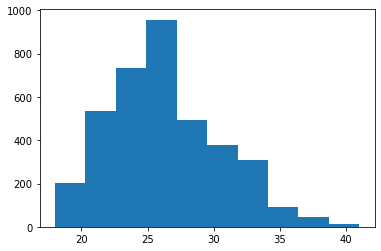

In [63]:
plt.hist(feature_set_1["Age"])
plt.show()

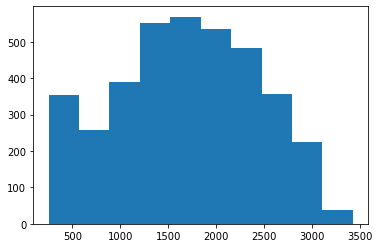

In [64]:
plt.hist(feature_set_1["Total Mins"])
plt.show()

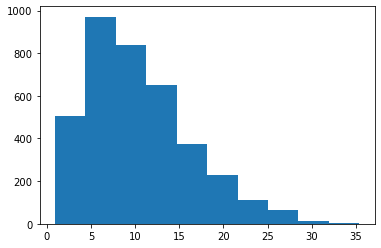

In [65]:
plt.hist(feature_set_1["PTS"])
plt.show()

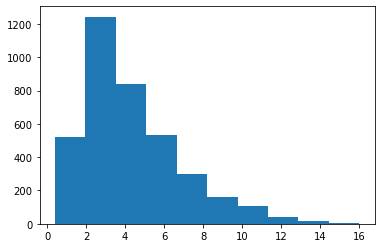

In [66]:
plt.hist(feature_set_1["TRB"])
plt.show()

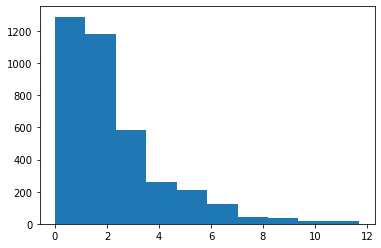

In [67]:
plt.hist(feature_set_1["AST"])
plt.show()

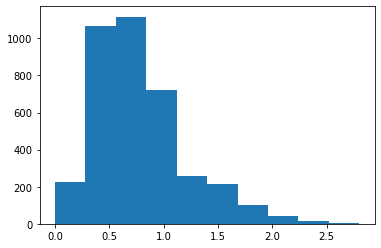

In [68]:
plt.hist(feature_set_1["STL"])
plt.show()

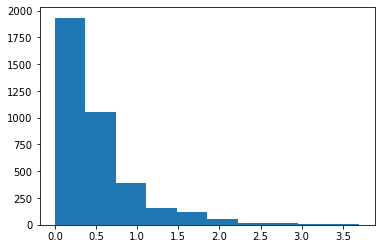

In [69]:
plt.hist(feature_set_1["BLK"])
plt.show()

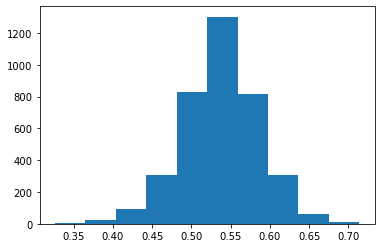

In [70]:
plt.hist(feature_set_1["TS%"])
plt.show()

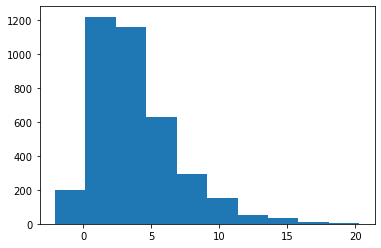

In [71]:
plt.hist(feature_set_1["WS"])
plt.show()

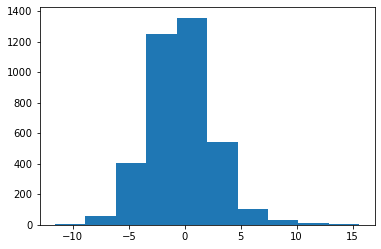

In [72]:
plt.hist(feature_set_1["BPM"])
plt.show()